<a href="https://colab.research.google.com/github/ShawnLiu119/Fraud_Detection_Credit/blob/main/Dataset_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transaction Data Simulator**

The simulated datasets will highlight most of the issues that practitioners of fraud detection face using real-world data. In particular, they will include class imbalance (less than 1% of fraudulent transactions), a mix of numerical and categorical features (with categorical features involving a very large number of values), non-trivial relationships between features, and time-dependent fraud scenarios.

### Transaction Features

Our focus will be on the most essential features of a transaction. In essence, a payment card transaction consists of any amount paid to a merchant by a customer at a certain time. The six main features that summarise a transaction therefore are: <br>

The transaction ID: A unique identifier for the transaction<br>
The date and time: Date and time at which the transaction occurs<br>
The customer ID: The identifier for the customer. Each customer has a unique identifier<br>
The terminal ID: The identifier for the merchant (or more precisely the terminal). Each terminal has a unique identifier<br>
The transaction amount: The amount of the transaction.<br>
The fraud label: A binary variable, with the value 0 for a legitimate transaction, or the value 1 for a fraudulent transaction.<br>
These features will be referred to as TRANSACTION_ID, TX_DATETIME, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, and TX_FRAUD.

The goal of the transaction data simulator will be to generate a table of transactions with these features. This table will be referred to as the labeled transactions table. Such a table is illustrated in Fig. 1.
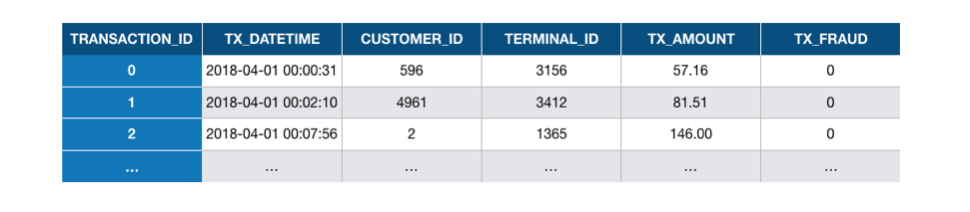

In [1]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

### **Customer profiles generation**
Each customer will be defined by the following properties:

**CUSTOMER_ID**: The customer unique ID (x_customer_id,y_customer_id): A pair of real coordinates (x_customer_id,y_customer_id) in a 100 * 100 grid, that defines the **geographical location** of the customer

**(mean_amount, std_amount):** The mean and standard deviation of the transaction amounts for the customer, **assuming that the transaction amounts follow a normal distribution**. The mean_amount will be drawn from a uniform distribution (5,100) and the std_amount will be set as the mean_amount divided by two.

**mean_nb_tx_per_day**: The average number of transactions per day for the customer, assuming that the number of transactions per day follows a Poisson distribution. This number will be drawn from a uniform distribution (0,4).<br>
The generate_customer_profiles_table function provides an implementation for generating a table of customer profiles. It takes as input the number of customers for which to generate a profile and a random state for reproducibility. It returns a DataFrame containing the properties for each customer.

#### Transaction generation process
The simulation will consist of five main steps:

1. Generation of customer profiles: <br>
Every customer is different in their spending habits. This will be simulated by defining some properties for each customer. The main properties will be their **geographical location, their spending frequency, and their spending amounts**. The customer properties will be represented as a table, referred to as the customer profile table.

2. Generation of terminal profiles: <br>
Terminal properties will simply consist of a geographical location. The terminal properties will be represented as a table, referred to as the terminal profile table.

3. Association of customer profiles to terminals: <br>
**We will assume that customers only make transactions on terminals that are within a radius of of their geographical locations**. This makes the simple assumption that a customer only makes transactions on terminals that are geographically close to their location. This step will consist of adding a feature 'list_terminals' to each customer profile, that contains the set of terminals that a customer can use.

4. Generation of transactions: <br>
The simulator will loop over the set of customer profiles, and generate transactions according to their properties (spending frequencies and amounts, and available terminals). This will result in a table of transactions.
Generation of fraud scenarios: This last step will label the transactions as legitimate or genuine. This will be done by following three different fraud scenarios.
The transaction generation process is illustrated below.

In [4]:
def generate_customer_profiles_table(n_customers, random_state=0):

    np.random.seed(random_state)

    customer_id_properties=[]

    # Generate customer properties from random distributions
    for customer_id in range(n_customers):

        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)

        mean_amount = np.random.uniform(10,500) # Arbitrary (but sensible) value --> credit transaction
        std_amount = mean_amount/2 # Arbitrary (but sensible) value

        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value

        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day])

    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day'])

    return customer_profiles_table

In [5]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,305.354054,152.677027,2.179533
1,1,42.365480,64.589411,224.417734,112.208867,3.567092
2,2,96.366276,38.344152,397.945269,198.972634,2.115580
3,3,56.804456,92.559664,44.807669,22.403834,0.348517
4,4,2.021840,83.261985,391.296808,195.648404,3.480049


### **Terminal Profiles Generation**

Each terminal will be defined by the following properties:

TERMINAL_ID: The terminal ID
(x_terminal_id,y_terminal_id): A pair of real coordinates (x_terminal_id,y_terminal_id) in a 100 * 100 grid, that defines the geographical location of the terminal
The generate_terminal_profiles_table function provides an implementation for generating a table of terminal profiles. It takes as input the number of terminals for which to generate a profile and a random state for reproducibility. It returns a DataFrame containing the properties for each terminal.

In [6]:
def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties=[]

    # Generate terminal properties from random distributions
    for terminal_id in range(n_terminals):

        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])

    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])

    return terminal_profiles_table

In [7]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


### **Association of customer profiles to terminals**

**In our design, customers can only perform transactions on terminals that are within a radius of r of their geographical locations.**

Let us first write a function, called get_list_terminals_within_radius, which finds these terminals for a customer profile. The function will take as input a customer profile (any row in the customer profiles table), an array that contains the geographical location of all terminals, and the radius r. It will return the list of terminals within a radius of r for that customer.

In [37]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):

    # Use numpy arrays in the following to speed up computations

    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)

    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)

    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])

    # Return the list of terminal IDs
    return available_terminals

In [38]:

# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50) #all customer

[2, 3]

In [16]:
#test
row = customer_profiles_table.iloc[4]
x_y_customer = row[['x_customer_id','y_customer_id']].values.astype(float)
x_y_customer

array([ 2.02183974, 83.26198455])

In [11]:
x_y_terminals

array([[54.88135039, 71.51893664],
       [60.27633761, 54.4883183 ],
       [42.36547993, 64.58941131],
       [43.75872113, 89.17730008],
       [96.36627605, 38.34415188]])

In [15]:
squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
squared_diff_x_y

array([[2794.12786602,  137.89917439],
       [3393.58652129,  827.92386976],
       [1627.60930377,  348.66499171],
       [1741.96726751,   34.99095774],
       [8900.87266191, 2017.61169197]])

For better visualization, let us plot

The locations of all terminals (in red)

The location of the last customer (in blue)

The region within radius of 50 of the first customer (in green)

In [39]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values,
           terminal_profiles_table.y_terminal_id.values,
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
           customer_profiles_table.iloc[customer_id].y_customer_id,
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

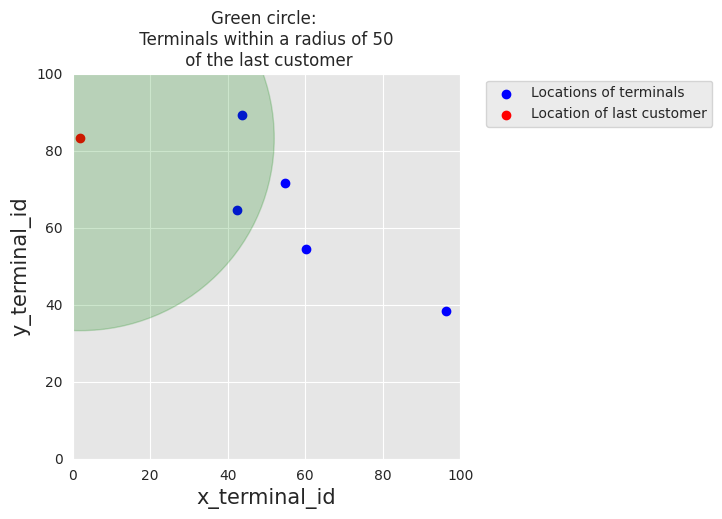

In [40]:
terminals_available_to_customer_fig

In [41]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1) #x represent each row
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,305.354054,152.677027,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,224.417734,112.208867,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,397.945269,198.972634,2.115580,"[1, 4]"
3,3,56.804456,92.559664,44.807669,22.403834,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,391.296808,195.648404,3.480049,"[2, 3]"


### **Generation of transactions**
The customer profiles now contain all the information that we require to generate transactions. The transaction generation will be done by a function generate_transactions_table that takes as input a customer profile, a starting date, and a number of days for which to generate transactions. It will return a table of transactions, which follows the format presented above (without the transaction label, which will be added in fraud scenarios generation).

In [42]:
def generate_transactions_table(customer_profile, start_date = "2018-04-01", nb_days = 10):

    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    # For all days
    for day in range(nb_days):

        # Random number of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)

        # If nb_tx positive, let us generate transactions
        if nb_tx>0:

            for tx in range(nb_tx):

                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that
                # most transactions occur during the day. 中午12点，往前往后各6个小时
                time_tx = int(np.random.normal(86400/2, 20000))

                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):

                    # Amount is drawn from a normal distribution
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)

                    amount=np.round(amount,decimals=2)

                    if len(customer_profile.available_terminals)>0:

                        terminal_id = random.choice(customer_profile.available_terminals) #从availabe的terminal id任选1个terminal

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions

In [ ]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0],
                                                         start_date = "2018-04-01",
                                                         nb_days = 5)
transaction_table_customer_0